<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS16_121_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [0]:
df.shape

(5, 2)

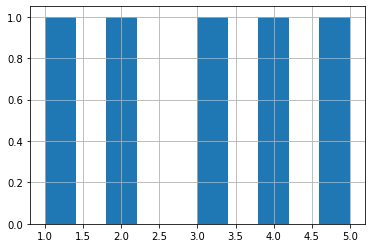

In [0]:
import matplotlib.pyplot as plt
df['a'].hist()
plt.show()

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

(10, 1)


,coinflips
0,1
1,0
2,1
3,0
4,0


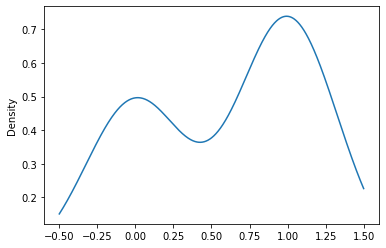

In [0]:
# Coinflips example - What is the population?
import numpy as np

coinflips = np.random.binomial(n=1, p=.5, size=10)

df = pd.DataFrame({'coinflips': coinflips})

df['coinflips'].plot.density()

print(df.shape)
df.head()

If we repeat the sampling why does our estimate of the mean move around so much? 

In [0]:
# Coinflips example - See the implications of randomness

coinflips = np.random.binomial(n=1, p=.5, size=1000)

df = pd.DataFrame({'coinflips': coinflips})

df['coinflips'].mean()

0.533

What happens as I increase the sample size? The sample mean deviates less from the...?

In [0]:
# More Information -> Greater Confidence in the face of randomness

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

$\bar{x} =$ Sample Mean (statistic)

$s = $ Sample Standard Deviation

$n = $ Sample Size (number of observations in the sample)

$\mu = $ Population Mean



**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

## The T-test Process:

Population Mean of our coinflips: .5

Sample Mean:

In [0]:
mu = .5

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=20)

x_bar = np.mean(coinflips)

x_bar

0.45

In [0]:
s = np.std(coinflips, ddof=1)

s

0.5104177855340405

In [0]:
n = len(coinflips)

n

20

In [0]:
t = (x_bar - mu) / (s / np.sqrt(n))

print("T Statistic:", t) 

T Statistic: -0.4380858271151805


In [0]:
from scipy import stats

## Parts of a T-test

1) Null Hypothesis: 

The sample mean is equal to the population mean.

2) Alternative Hypothesis:

The sample mean is not equal to the population mean.

3) Confidence Level: 95%

In [0]:
# Lets use a tool called a t-test to test if this is a fair coin or not
# Pass this function my sample and my population parameter
stats.ttest_1samp(coinflips, mu)

Ttest_1sampResult(statistic=-0.4380858271151805, pvalue=0.6662641376986584)

4) P-value: The probability of the null hypothesis being true **given** the sample that I have collected.

5) Conclusion: Given a p-value of .666 (66.6% chance of the null hypothesis being true) we find that there is not a statistically significant difference between our sample and our conception of the population (probability of heads = .05)

## Example of 1-sample t-test using a "real" dataset

In [0]:
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-11 17:18:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-05-11 17:18:03 (128 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
rep = df[df['party'] == 'republican']


rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


## 1-sample t-test of republican support for the "immigration" bill

Population Parameter? (What proportion of republicans voted "yes" on the "immigration")

### 1) Null Hypothesis: 

$H_0: \bar{x}_1 == \mu$

Sample mean == our concept of the population

Sample mean == .2 (proportion of repblicans that **we think** support the "immigration" bill)

### 2) Alternative Hypothesis: 

$H_a: \bar{x}_1 \neq \mu$

Sample Mean != .2 - The proportion of Republican support for this bill is something other than 20.

### 3) Confidence Level: 

95% (I'll only allow myself to be tricked by the randomness of sampling 5% of the time.)

Critical Value (The number that I will compare my p-value to, in order to determine if I should reject or fail to reject the null hypothesis.)

1 - .95 = Critical Value = .05

I will compare my p-value to .05

if my p-value is **Greater Than or Equal to** .05 then I will **fail to reject** the null hypothesis (There is no signicant statistical difference between my sample mean and my concept of the population)

if my p-value is **Less Than** .05 then I will **reject** the null hypothesis (There **is** signicant statistical difference between my sample mean and my concept of the population) - They are not the same


In [0]:
# Drop NaNs from a single column of a dataframe
rep_votes_no_nans = rep['immigration'].dropna()

rep_votes_no_nans.isnull().sum()

0

In [0]:
stats.ttest_1samp(rep_votes_no_nans, .2)

Ttest_1sampResult(statistic=9.219738258523824, pvalue=1.4147112274226787e-16)

In [0]:
len(rep_votes_no_nans)

165

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

Conclusion: Given a t-statistic of 9.2, and p-value of .0000000000000001414, we reject the null hypothesis that republican support for the immigration bill is .2 and suggest the alternative republican support is something other than 20%.

### ttest_1samp will drop NaNs for you

In [0]:
stats.ttest_1samp(rep['immigration'], .2, nan_policy='omit')

Ttest_1sampResult(statistic=9.219738258523822, pvalue=1.4147112274227038e-16)

## What if our concept of the population had been closer to the sample mean?

In this sample, what proportion of republicans support the immigration bill

In [0]:
rep['immigration'].mean()

0.5575757575757576

In [0]:
stats.ttest_1samp(rep['immigration'], .4, nan_policy='omit')

Ttest_1sampResult(statistic=4.062935503756261, pvalue=7.497269866258895e-05)

In [0]:
stats.ttest_1samp(rep['immigration'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=1.4845341263724807, pvalue=0.1395867786115413)

80% confidence Level: What would I compare my p-value to? What is the p-value threshold? 

1 - .8 = .2

(I fail to reject the null hypothesis at the 80% level.) 

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



1) Null Hypothesis: Burners cook pancakes in the same amount of time

$H_0: \bar{x}_1 == \bar{x}_2$

2) Alternative Hypothesis: They cook pancakes at different rates. One is faster than the other.

$H_a: \bar{x}_1 \neq \bar{x}_2$

3) Confidence Level: 95%



In [0]:
# Simulate pancake cooking times according to the conditions described above
# We're generating fake data to test these hypotheses.

# Generate a fake dataset

xbar1 = 180
s1 = 5

xbar2 = 178.5
s2 = 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, s2, 800)

In [0]:
# two-sample t-test (for two independent means)
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.3405425469127366, pvalue=2.8885059421304756e-10)

Due to a t-statistic o 6.34 and a p-value of .000000000289 we reject the null hypothesis that the two burners cook pancakes at the same speed and suggest the alternative, that the two burners do not cook pancakes at the same speed. Interpreting the sign on the t-statistic, we conclude that burner 2 cooks pancakes faster than burner 1.

## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

In [0]:
# Let's do it!

## 2-sample t-test from Assignment Dataset

Instead of comparing a "concept of a population" to a sample

I am going to compare one sample to a second sample 

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In a two-sample t-test, I don't get to pick what my concept of the population is. 

1) Null Hypothesis in a 2-sample T-test is **always**: 

Sample mean of the first sample is equal to the sample mean of the second sample. 

2) Alternative Hypothesis: The two means are not equal

3) Confidence Level: 95%


What I'm really asking: Do republicans support this bill at the same rate as democrats or do they show different levels of support?

In [0]:
stats.ttest_ind(dem['handicapped-infants'], rep['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)

Conclusion: Due to a t-statisc of -9.2, and p-value of 0. We (**reject**/fail to reject) the null hypothesis that democrat support for the handicapped-infants bill is equal to republican support for the handicapped-infants bill? This suggests the alternative that republicans and democrats do not support this bill at the same level. 

p-value < 1-.95 -> reject the null hypothesis

In [0]:
dem['handicapped-infants'].mean()

0.6046511627906976

In [0]:
rep['handicapped-infants'].mean()

0.18787878787878787

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means